In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
from functools import reduce

In [2]:
deaths = pd.read_csv("TABLE_III._Deaths_in_122_U.S._cities.csv")
deaths = deaths[deaths.columns.drop(list(deaths.filter(regex='flag')))]
deaths = deaths[deaths.columns.drop(list(deaths.filter(regex='Location')))]

In [3]:
deaths.rename(columns = {'Reporting Area':'area',
                         'MMWR YEAR': 'year',
                         'MMWR WEEK':'week',
                         'All causes, by age (years), All Ages**':'all',
                         'All causes, by age (years), LT 1':'LT 1',
                         'All causes, by age (years), 1–24':'1-24',
                         'All causes, by age (years), 25–44':'25-44',
                         'All causes, by age (years), 45–64':'45-64',
                         'All causes, by age (years), ≥65':'65+',
                         'P&I† Total':'total'},
                         inplace = True)

In [4]:
#totals in regions (quarters)

regions = deaths.loc[0:8, "area"].tolist()
deaths = deaths[deaths["area"].isin(regions)]

deaths["date"] = pd.to_datetime(deaths.year.astype(str), format='%Y') + \
                     pd.to_timedelta((deaths.week-1).mul(7).astype(str) + ' days')
deaths_Q = deaths.groupby(["area", pd.PeriodIndex(deaths.date, freq='Q')])["all"].sum()
deaths_Q = deaths_Q.unstack().rename(columns = {
            "2016Q1" : "2016Q1",
            "2016Q2" : "2016Q2",
            "2016Q3" : "2016Q3",
        })

Text(0, 0.5, 'Number of Deaths')

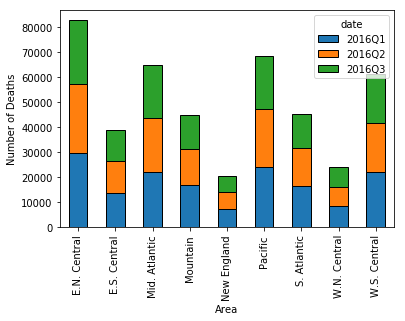

In [5]:
deaths_Q.plot(kind='bar', stacked=True, rot=90, edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Number of Deaths')


Text(0, 0.5, 'Number of Deaths')

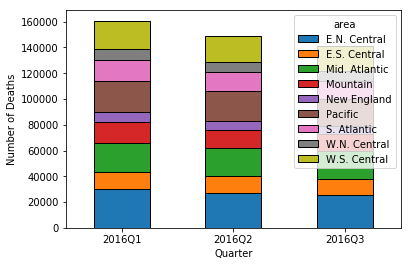

In [8]:
deaths_Q.T.plot(kind='bar', stacked=True, rot=0, edgecolor='black')
plt.xlabel('Quarter')
plt.ylabel('Number of Deaths')

In [9]:
##age in regions(quarter)
##df for different age buckets
deaths_65 = deaths.groupby(["area", pd.PeriodIndex(deaths.date, freq='Q')])["65+"].sum()
deaths_45_64 = deaths.groupby(["area", pd.PeriodIndex(deaths.date, freq='Q')])["45-64"].sum()
deaths_25_44 = deaths.groupby(["area", pd.PeriodIndex(deaths.date, freq='Q')])["25-44"].sum()
deaths_1_24 = deaths.groupby(["area", pd.PeriodIndex(deaths.date, freq='Q')])["1-24"].sum()
deaths_1 = deaths.groupby(["area", pd.PeriodIndex(deaths.date, freq='Q')])["LT 1"].sum()

deaths_65

area           date  
E.N. Central   2016Q1    19838.0
               2016Q2    17916.0
               2016Q3    16623.0
E.S. Central   2016Q1     9065.0
               2016Q2     8132.0
               2016Q3     8148.0
Mid. Atlantic  2016Q1    15947.0
               2016Q2    15435.0
               2016Q3    14881.0
Mountain       2016Q1    11437.0
               2016Q2    10025.0
               2016Q3     8781.0
New England    2016Q1     5164.0
               2016Q2     4608.0
               2016Q3     4203.0
Pacific        2016Q1    17158.0
               2016Q2    16285.0
               2016Q3    14690.0
S. Atlantic    2016Q1    10749.0
               2016Q2     9561.0
               2016Q3     8496.0
W.N. Central   2016Q1     5406.0
               2016Q2     5039.0
               2016Q3     4875.0
W.S. Central   2016Q1    14259.0
               2016Q2    12628.0
               2016Q3    12437.0
Name: 65+, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


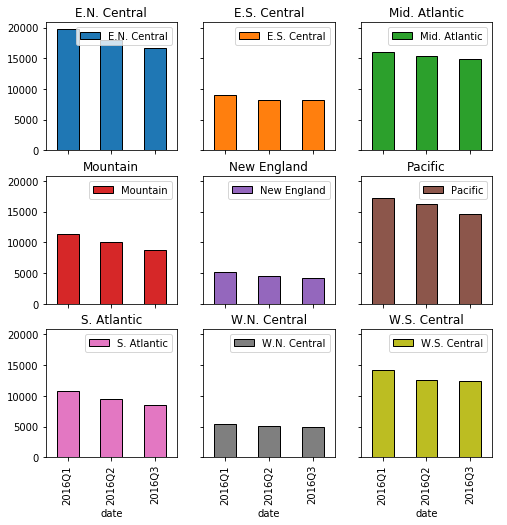

In [10]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, sharex=True, sharey=True, figsize = (8,8)
)
fig.add_subplot(111, frameon=False)

deaths_65_u = deaths_65.unstack(level=0).plot(kind='bar', ax=axes, subplots=True, edgecolor='black')

#deaths_65.unstack(level=0).plot(kind='bar', ax=axes, subplots=True, edgecolor='black')

plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

plt.grid(False)
#plt.ylabel("Number of Deaths")

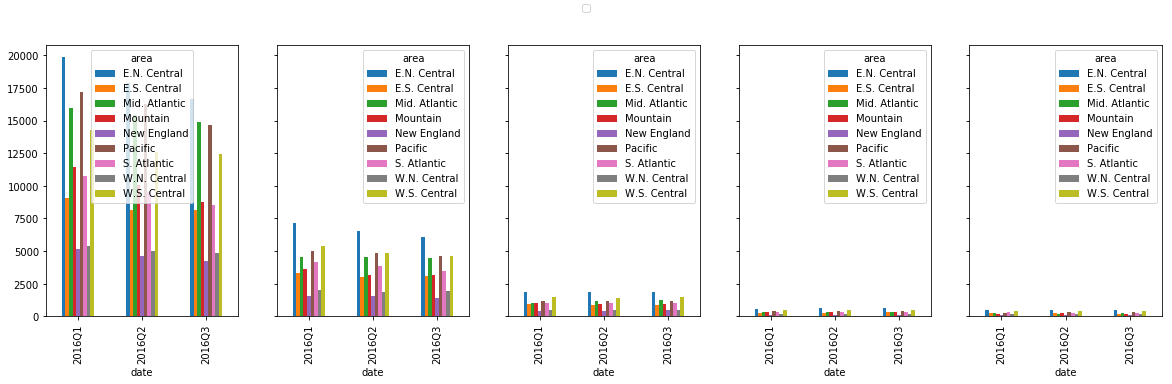

In [11]:

fig, axes = plt.subplots(
    nrows=1, ncols=5, sharex=True, sharey=True, figsize = (20,5)
)

#axes[0].legend(['line 1'])
handles, labels = axes[4].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')


deaths_65.unstack(level=0).plot(kind='bar', ax=axes[0], )
deaths_45_64.unstack(level=0).plot(kind='bar', ax=axes[1])
deaths_25_44.unstack(level=0).plot(kind='bar', ax=axes[2])
deaths_1_24.unstack(level=0).plot(kind='bar', ax=axes[3])
deaths_1.unstack(level=0).plot(kind='bar', ax=axes[4])

<Figure size 720x720 with 0 Axes>

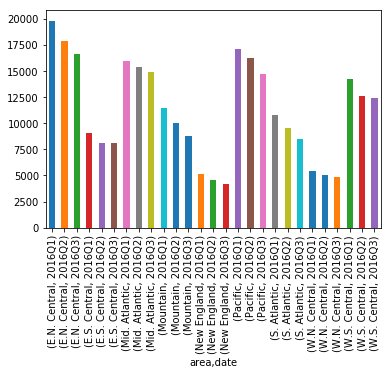

<Figure size 720x720 with 0 Axes>

In [12]:
deaths_65.plot(kind='bar')
plt.figure(figsize=(10,10))

In [13]:
deaths_65u = deaths_65.unstack().rename(columns = {
            "2016Q1" : "2016Q1",
            "2016Q2" : "2016Q2",
            "2016Q3" : "2016Q3",
        })
deaths_65u

date,2016Q1,2016Q2,2016Q3
area,,,
E.N. Central,19838.0,17916.0,16623.0
E.S. Central,9065.0,8132.0,8148.0
Mid. Atlantic,15947.0,15435.0,14881.0
Mountain,11437.0,10025.0,8781.0
New England,5164.0,4608.0,4203.0
Pacific,17158.0,16285.0,14690.0
S. Atlantic,10749.0,9561.0,8496.0
W.N. Central,5406.0,5039.0,4875.0
W.S. Central,14259.0,12628.0,12437.0


<Figure size 720x720 with 0 Axes>

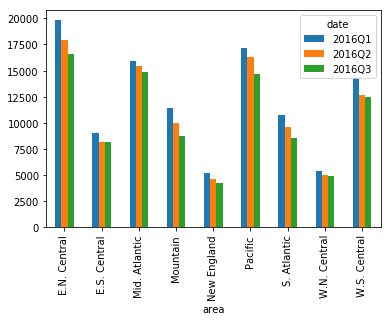

<Figure size 720x720 with 0 Axes>

In [14]:
deaths_65u.plot(kind='bar')
plt.figure(figsize=(10,10))

<Figure size 432x288 with 0 Axes>

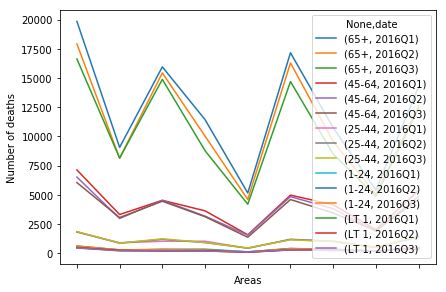

<Figure size 432x288 with 0 Axes>

In [15]:
deaths_age = [deaths_65.to_frame() , deaths_45_64.to_frame(), deaths_25_44.to_frame(), deaths_1_24.to_frame(), deaths_1.to_frame()]
#deaths_age = [deaths_65 , deaths_45_64, deaths_25_44, deaths_1_24, deaths_1]

deaths_age_all = reduce(lambda left,right: pd.merge(left,right,on=['area', 'date']), deaths_age)

deaths_age_all = deaths_age_all.unstack().rename(columns = {
            "2016Q1" : "2016Q1",
            "2016Q2" : "2016Q2",
            "2016Q3" : "2016Q3",
        })

deaths_age_all.plot(kind='line')
plt.xlabel('Areas')
plt.ylabel('Number of deaths')
plt.tight_layout(pad=0., w_pad=-16.5, h_pad=0.0)
plt.figure()